# Tugas Seismic Atrribute : Complex Atrributes
# Sabda Wahidatulhusna
# 12319030

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import segyio

# Import data seismic SEGY 

In [4]:
filename1 = 'D:/Programing/Seismic Atribut Reservoir/seismic_isr_211122_5gb.sgy'

In [5]:

seismic = segyio.tools.cube(filename1)

In [6]:
seismic.shape

(1907, 509, 1626)

In [7]:
import bruges as bg

# Slice Data Seismic menjadi 2D  kemudian ambil salah satu trace dari data slice 2D

In [8]:
#Attribute untuk seismic 2D
seis=seismic[:1907,:509,746:1626]
ss=seis[:,150,:]
#Attribute untuk Trace Seismic
seis1=seismic[100]
seismictrace=seis1[99]
Attribute=pd.DataFrame(seismictrace)
Time=np.linspace(2,-6502,1626)
print(len(Time))
Attribute['Time']=Time
Attribute['timeabs']=Attribute['Time'].astype(int)


1626


# Mempersiapkan fungsi perhitungan hilbert

In [9]:
from scipy import linalg, fft as sp_fft
def hilbert(x, N=None, axis=-1):
    x = np.asarray(x)
    if np.iscomplexobj(x):
        raise ValueError("x must be real.")
    if N is None:
        N = x.shape[axis]
    if N <= 0:
        raise ValueError("N must be positive.")

    Xf = sp_fft.fft(x, N, axis=axis)
    h = np.zeros(N, dtype=Xf.dtype)
    if N % 2 == 0:
        h[0] = h[N // 2] = 1
        h[1:N // 2] = 2
    else:
        h[0] = 1
        h[1:(N + 1) // 2] = 2

    if x.ndim > 1:
        ind = [np.newaxis] * x.ndim
        ind[axis] = slice(None)
        h = h[tuple(ind)]
    x = sp_fft.ifft(Xf * h, axis=axis)
    return x


# Perhitungan Complex Attribute 

In [10]:
#imaginer (gese fasa 90 derajat)
RT=seismictrace
Attribute['real']=RT
print(RT)
imaginer_trace = hilbert(RT)
I = imaginer_trace.imag
Attribute['Imajiner']= I
# reflection strength
RS = np.abs(imaginer_trace)
Attribute['reflectionsstrenght']=RS
# instantaneous phase
IP = np.arctan(RS/RT)
Attribute['Instantaneousphase']=IP
# instantaneous frequency
IF = np.divide(IP, abs(Time))
Attribute['Instantaneousfrequency']=IF
# # sweetness
Swe = RS/np.sqrt(IF)
Attribute['sweetness']=Swe


[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.4611226e+08
 -6.3730304e+08 -7.6476365e+08]


C:\Users\Sabda\AppData\Local\Temp\ipykernel_7336\421678265.py:12: RuntimeWarning: divide by zero encountered in true_divide
  IP = np.arctan(RS/RT)
C:\Users\Sabda\AppData\Local\Temp\ipykernel_7336\421678265.py:18: RuntimeWarning: invalid value encountered in sqrt
  Swe = RS/np.sqrt(IF)


# Plot hasil perhitungan Complex Attribute

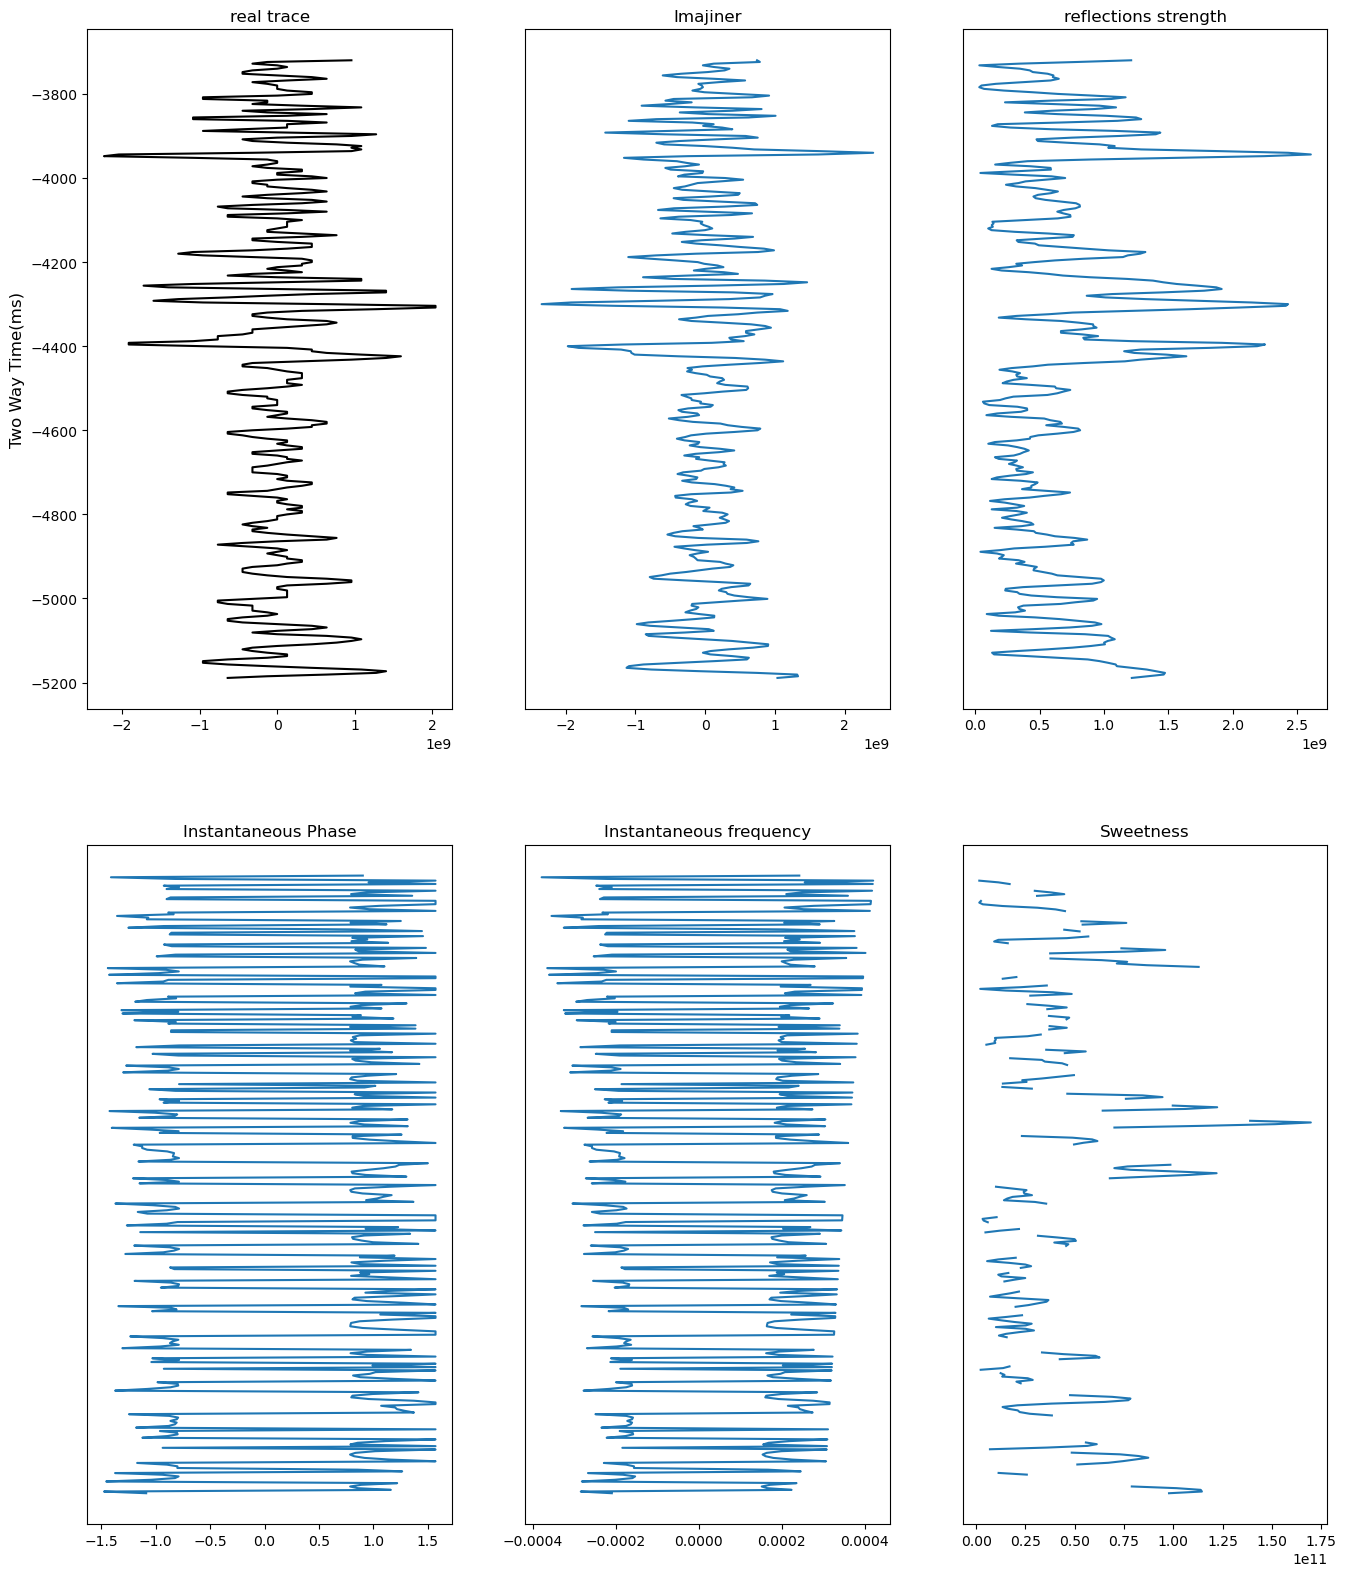

In [28]:

zbot = -5189; ztop = -3720
ll = Attribute[(Attribute.timeabs >= zbot) & (Attribute.timeabs <= ztop)]
plt.figure(figsize=(16,30) )

plt.subplot(3,3,1)
plt.plot(ll.real, ll.timeabs, 'black')
plt.title("real trace")
plt.ylabel("Two Way Time(ms)", fontsize = 12)

plt.subplot(3,3,2)
plt.plot(ll.Imajiner, ll.timeabs)
plt.title("Imajiner")
plt.yticks([])

plt.subplot(3,3,3)
plt.plot(ll.reflectionsstrenght, ll.timeabs)
plt.title("reflections strength")
plt.yticks([])

plt.subplot(3,3,4)
plt.plot(ll.Instantaneousphase, ll.timeabs)
plt.title("Instantaneous Phase")
plt.yticks([])

plt.subplot(3,3,5)
plt.plot(ll.Instantaneousfrequency, ll.timeabs)
plt.title("Instantaneous frequency")
plt.yticks([])

plt.subplot(3,3,6)
plt.plot(ll.sweetness, ll.timeabs)
plt.title("Sweetness")
plt.yticks([])


plt.show()

# Percobaan jika menggunakan Slice inline/Crossline Seismic

In [12]:
env = bg.attribute.envelope(ss)
phase = bg.attribute.instantaneous_phase(ss)

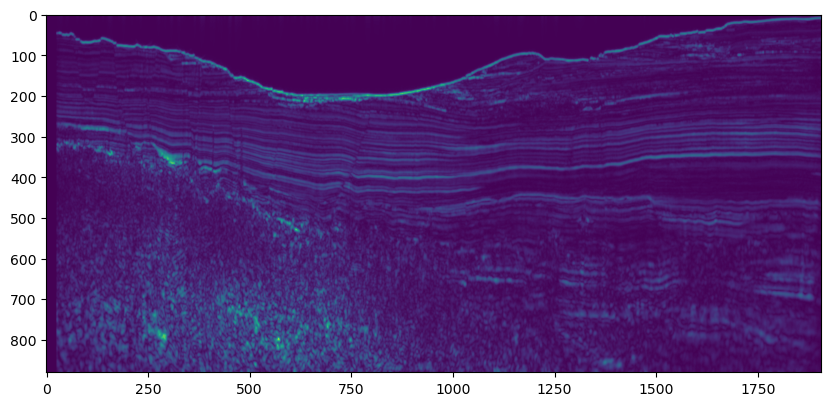

In [13]:
plt.figure(figsize=(10, 20))
plt.imshow(env.T, interpolation='bicubic')

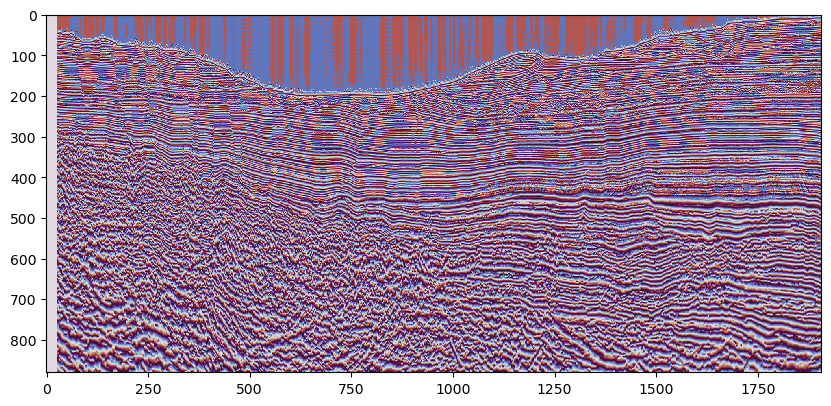

In [14]:
plt.figure(figsize=(10,20))
plt.imshow(phase.T, cmap='twilight_shifted', interpolation='none')

In [15]:
freq = bg.attribute.instantaneous_frequency(ss, dt=0.004)

c:\Users\Sabda\anaconda3\envs\pg\lib\site-packages\bruges\attribute\complex.py:45: RuntimeWarning: divide by zero encountered in log
  return np.abs(h) * np.sin(np.log(h).imag)
c:\Users\Sabda\anaconda3\envs\pg\lib\site-packages\bruges\attribute\complex.py:110: RuntimeWarning: invalid value encountered in true_divide
  expr = (traces[:-1] * y[1:] - traces[1:] * y[:-1]) / (traces[:-1] * traces[1:] + y[1:] * y[:-1])


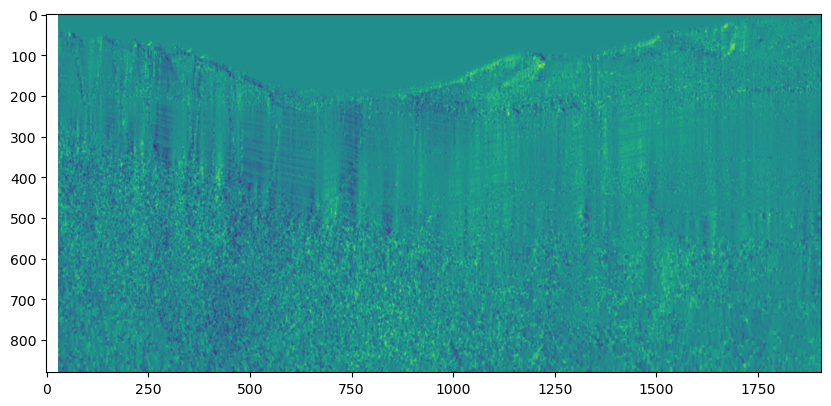

In [16]:
plt.figure(figsize=(10, 20))
plt.imshow(freq.T, interpolation='bicubic')

In [17]:
print(env.shape)
print(freq.shape)

(1907, 880)
(1906, 880)


In [18]:
envv=np.delete(env, 1, axis=0)

In [19]:
envv.shape

(1906, 880)

In [20]:
Swe = np.divide(envv,np.sqrt(freq))

C:\Users\Sabda\AppData\Local\Temp\ipykernel_7336\520512394.py:1: RuntimeWarning: invalid value encountered in sqrt
  Swe = np.divide(envv,np.sqrt(freq))
C:\Users\Sabda\AppData\Local\Temp\ipykernel_7336\520512394.py:1: RuntimeWarning: divide by zero encountered in true_divide
  Swe = np.divide(envv,np.sqrt(freq))


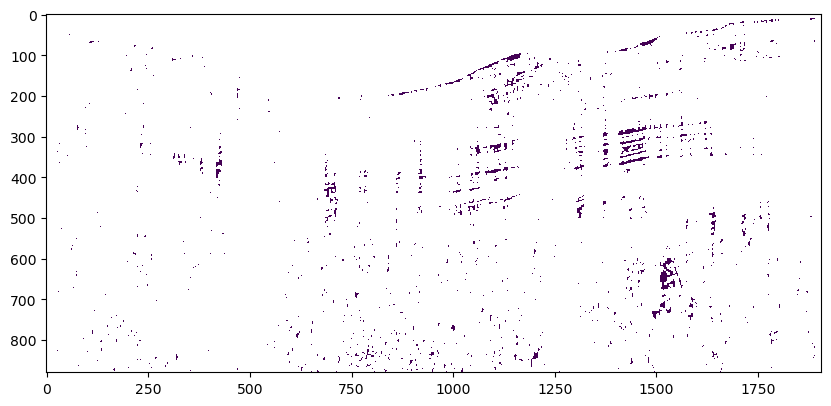

In [21]:
plt.figure(figsize=(10, 20))
plt.imshow(Swe.T, cmap='viridis')

# Percobaan kedua

In [22]:
import sys
sys.path.append('D:/Programing/computational-geophysics/seismic')
sys.path.append('D:/Programing/computational-geophysics/seismic/attributes')


In [23]:
from seis_attribute import sliceAttribute, display_attribute
from seistool import openSegy3D, sliceCube

In [24]:
seismic1 = openSegy3D(filename1)

Successfully read 

Inline range from 1084 to 2990
Crossline range from 1259 to 1767
TWT from 0.0 to 6500.0
Sample rate: 4.0 ms
Survey rotation: 6.28 deg


In [25]:
data = seismic1.data
inlines, crosslines, twt = seismic1.inlines, seismic1.crosslines, seismic1.twt

print(data)

[[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
    0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
    0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
    0.0000000e+00  0.0000000e+00]
  ...
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
    0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
    0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
    0.0000000e+00  0.0000000e+00]]

 [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
    0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
    0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
    0.0000000e+00  0.0000000e+00]
  ...
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
    0.0000

Text(0.5, 1.0, 'enve')

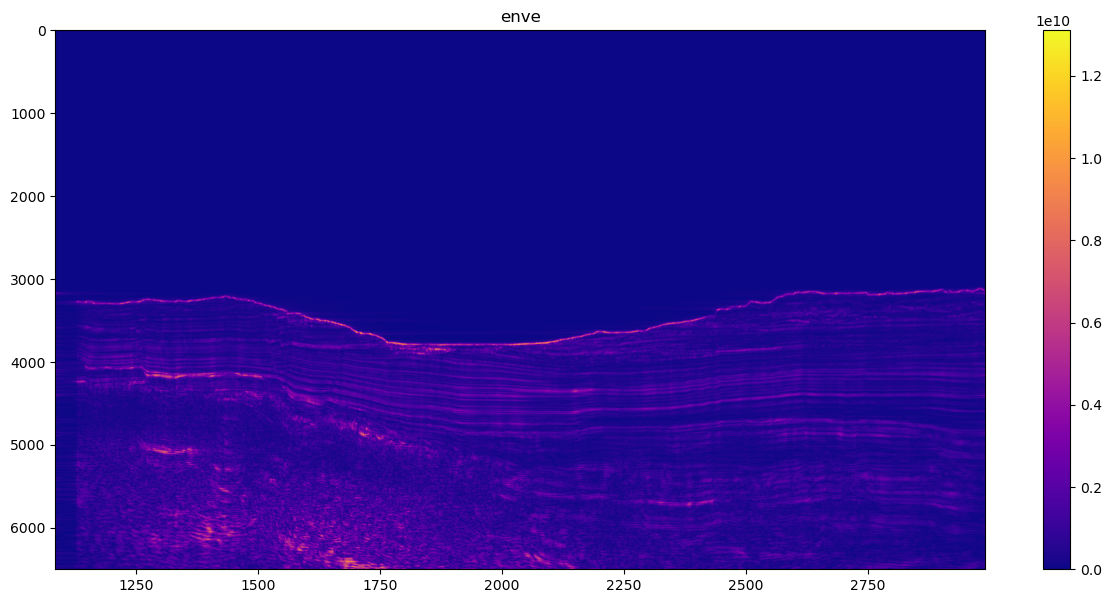

In [26]:
attributes = ['enve', 'inphase', 'cosphase', 'ampcontrast', 'ampacc', 
              'infreq', 'inband', 'domfreq', 'freqcontrast', 'sweet', 
              'quality', 'resphase', 'resfreq', 'resamp', 'apolar']

cmap = ['plasma', 'PuOr_r', 'gray', 'cubehelix', 'cubehelix',
        'jet', 'plasma', 'jet', 'jet', 'plasma',
        'plasma', 'plasma', 'jet', 'jet', 'jet']
sliceAttribute(seismic1, output='2d', type='xl', xline_loc=1700,  
                attribute_class='CompleTrace', attribute_type='enve',
                display=True, figsize=(15,7))   
plt.title(attributes[0])  
